In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

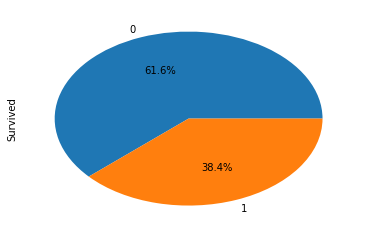

In [3]:
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

In [5]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

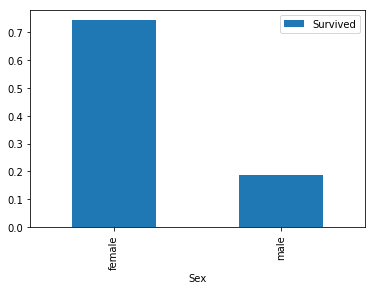

In [7]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

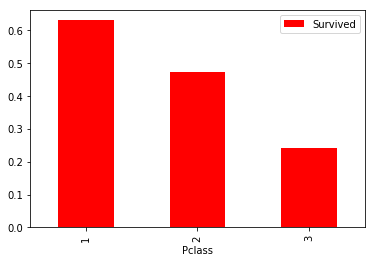

In [9]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(color=['r','g','b'])

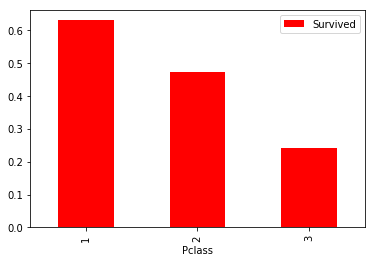

In [11]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(color=['r','g','b'])

In [12]:
train.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

/Users/sunxiaoyong/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/sunxiaoyong/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/sunxiaoyong/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


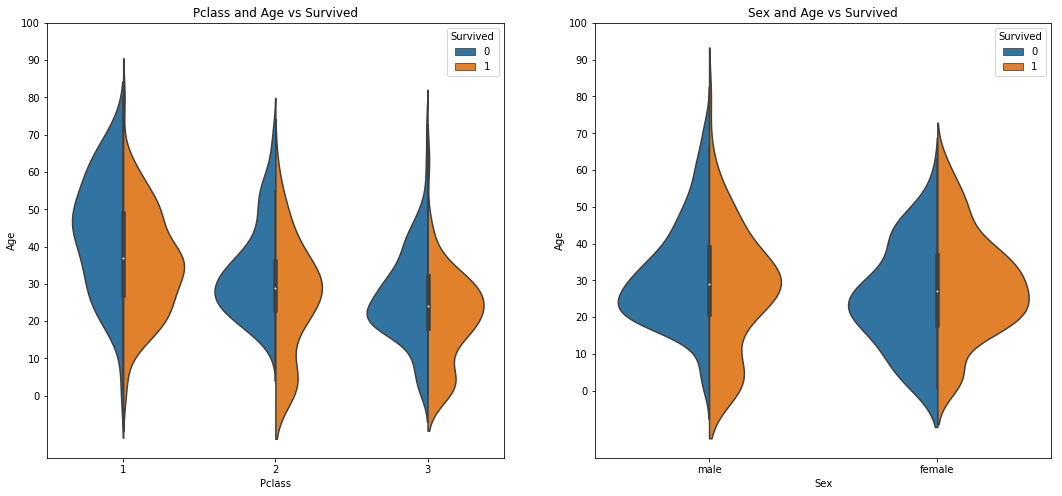

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

/Users/sunxiaoyong/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Embarked and Survived')

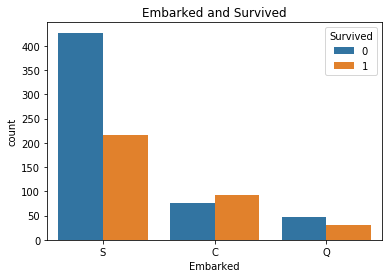

In [16]:
sns.countplot('Embarked',hue='Survived',data=train)
plt.title('Embarked and Survived')

Text(0.5,1,'SibSp and Survived')

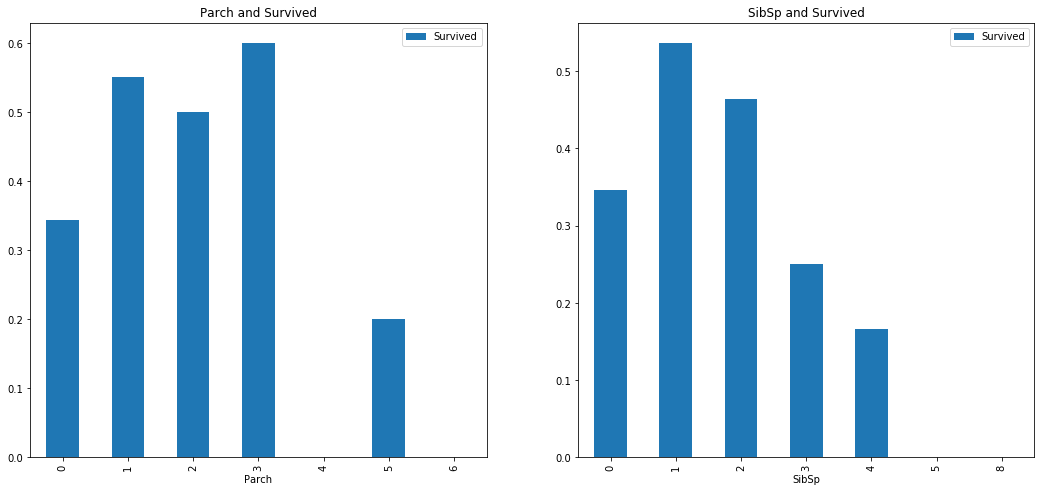

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

In [19]:
train_data_org = pd.read_csv('train.csv')
test_data_org = pd.read_csv('test.csv')
test_data_org['Survived'] = 0
combined_train_test = train_data_org.append(test_data_org)

/Users/sunxiaoyong/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [21]:
if combined_train_test['Embarked'].isnull().sum() != 0:
    combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [22]:
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [23]:
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)